#### Sample UseCase to send RHESSI limb flare to JHV
requirements for samp4jhv:
    - pandas, numpy and other, usually default included packages
    - astropy 4.0+
    - sunpy 1.1+
    - requests
    - bs4

In [1]:
# check your installed versions
import astropy  # >= 4.0
import sunpy    # >= 1.1
astropy.__version__, sunpy.__version__

('4.0', '2.0.dev333+gd31f9652b')

In [2]:
%cd ../../
# use magic jupyter directive to move to root directory of the samp4jhv module
# make sure your cloned repository is called "samp4jhv", or change the import statements below

import samp4jhv.ext.rhessi as s4j
from samp4jhv import send_map_layers_to_samp as send_to_samp

C:\Projects\JHV\Python


In [3]:
# get list of limb flares (reads only the datetime of when the flare occurred)
limb_flares = s4j.read_limb_flares()
len(limb_flares), limb_flares[0:3] # display length and first 3

(116,
 [datetime.datetime(2002, 3, 7, 17, 50, 44),
  datetime.datetime(2002, 3, 28, 17, 56, 7),
  datetime.datetime(2002, 4, 4, 10, 43, 52)])

In [4]:
# assume we're interested in the limb flare with index 11 - for AIA correlation use index >=55
lftime = limb_flares[11].strftime("%Y-%m-%dT%H:%M:%S") # 80
lftime

'2002-07-05T08:03:06'

In [5]:
%%time

# ToDo make faster by efficiently filtering DF in s4j.get_flare_list
flare = s4j.get_flare_list(lftime, lftime, source="i4DS")
flare

Wall time: 8.89 s


,ID_NUMBER,START_TIME,END_TIME,PEAK_TIME,BCK_TIME,IMAGE_TIME,ENERGY_RANGE_FOUND,ENERGY_HI,PEAK_COUNTRATE,BCK_COUNTRATE,...,TOT_PHFLUENCE,E_PHFLUENCE,PEAK_PHFLUX_SIGMA,TOT_PHFLUENCE_SIGMA,E_PHFLUENCE_SIGMA,GOES_LEVEL_PK,ALT_ID,FLAGS_FORMATTED,DURATION,POS_RADIAL
289,2070502,2002-07-05 08:01:12,2002-07-05 08:15:40,2002-07-05 08:04:22,"[2002-07-05 08:00:12, 2002-07-05 08:01:12]","[2002-07-05 08:01:50, 2002-07-05 08:07:50]","[6.0, 12.0]","[12.0, 25.0]",200.0,1.728889,...,22652682.0,20264680.0,26720.164062,197490.390625,361907.5,"[6.2563226e-06, 1.0985428e-06]",20020705_080112,A1 DF GE P1 PE Q3,868,962


In [6]:
%%time
# get image cube
url = s4j.get_image_cube_url(flare.iloc[0])
print(url)

https://hesperia.gsfc.nasa.gov/rhessi_extras/flare_images/2002/07/05/20020705_0801_0815/CLEAN/hsi_imagecube_clean_20020705_0801_14tx2e.fits
Wall time: 1.85 s


In [7]:
# get single sunpy.Maps from image cube
maps = s4j.hsi_fits2map(url)

In [11]:
# 1. make sure JHV >= 2.16 is running
# 2. send map layers via SAMP to JHV - if many images, increase defer time so JHV can load tmp files before they get deleted
send_to_samp(maps, defer_cleanup_s=10)

 [sunpy.map.mapbase]


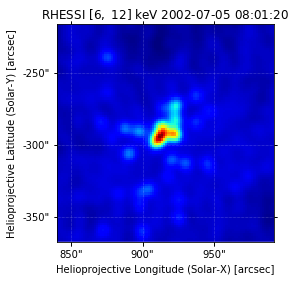

 [sunpy.map.mapbase]


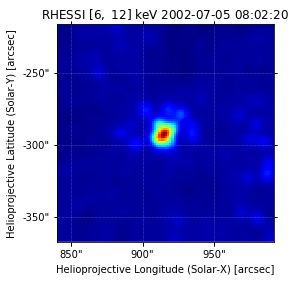

 [sunpy.map.mapbase]


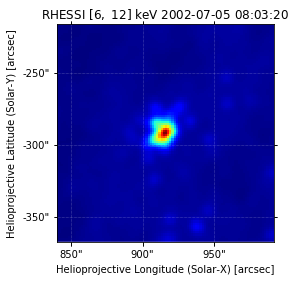

 [sunpy.map.mapbase]


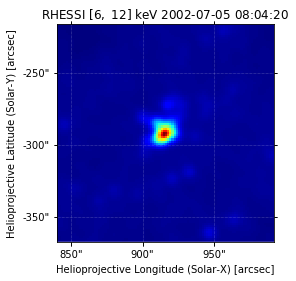

 [sunpy.map.mapbase]


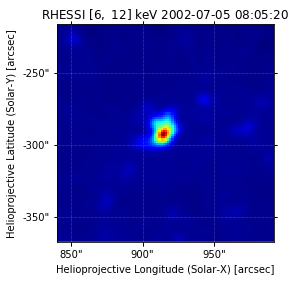

 [sunpy.map.mapbase]


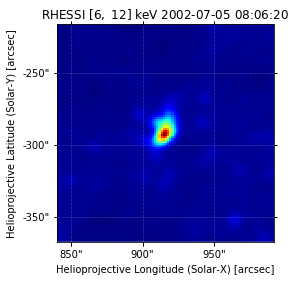

 [sunpy.map.mapbase]


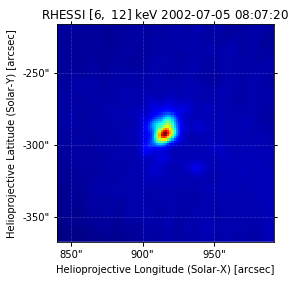

 [sunpy.map.mapbase]


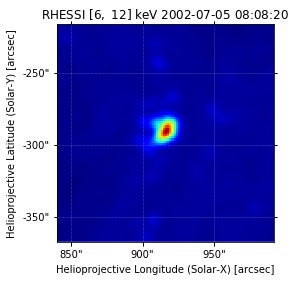

 [sunpy.map.mapbase]


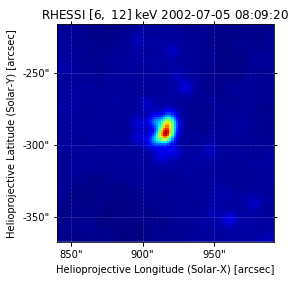

 [sunpy.map.mapbase]


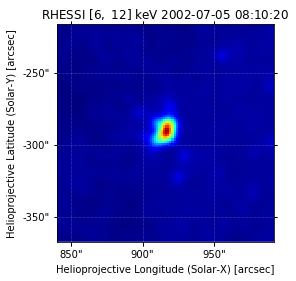

 [sunpy.map.mapbase]


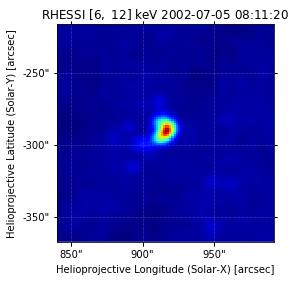

 [sunpy.map.mapbase]


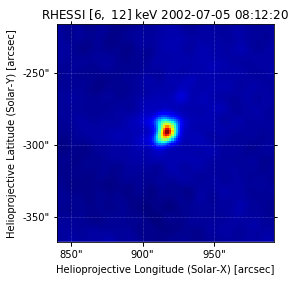

 [sunpy.map.mapbase]


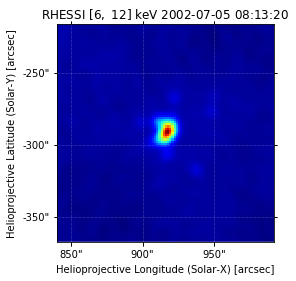

 [sunpy.map.mapbase]


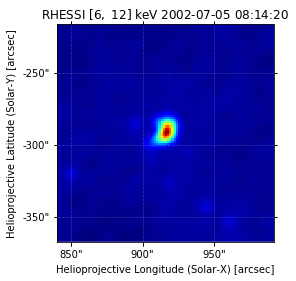

 [sunpy.map.mapbase]


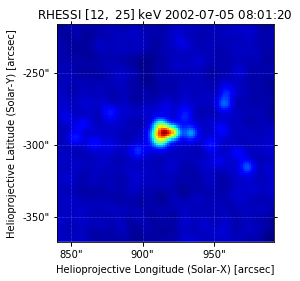

 [sunpy.map.mapbase]


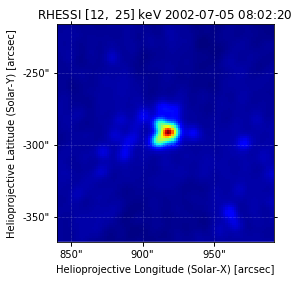

 [sunpy.map.mapbase]


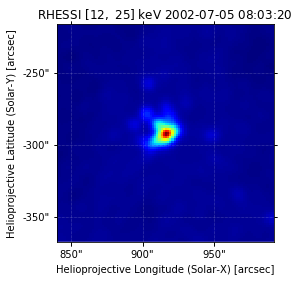

 [sunpy.map.mapbase]


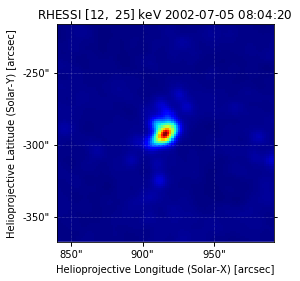

 [sunpy.map.mapbase]


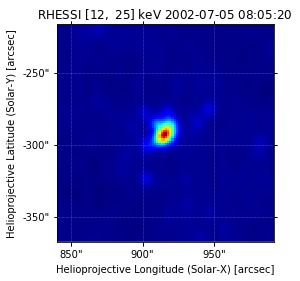

 [sunpy.map.mapbase]


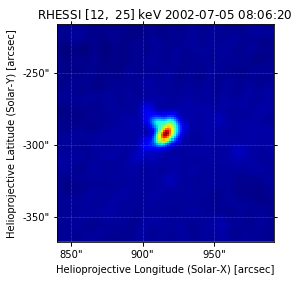

 [sunpy.map.mapbase]


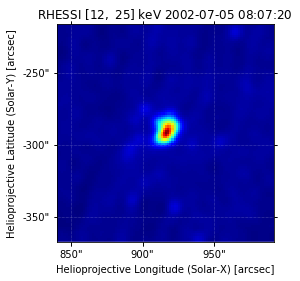

 [sunpy.map.mapbase]


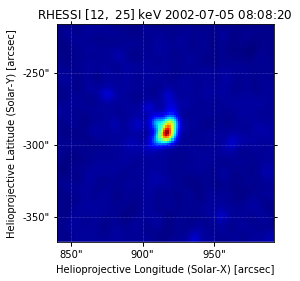

 [sunpy.map.mapbase]


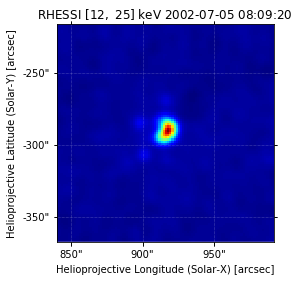

 [sunpy.map.mapbase]


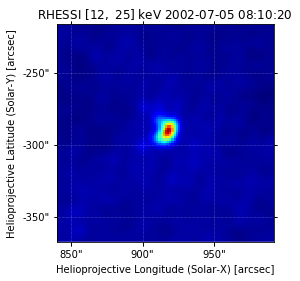

 [sunpy.map.mapbase]


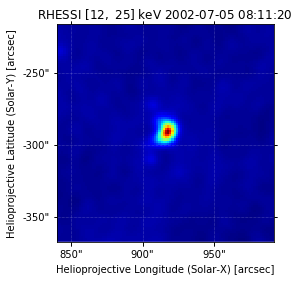

 [sunpy.map.mapbase]


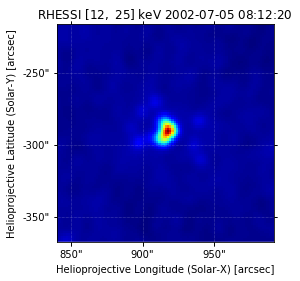

 [sunpy.map.mapbase]


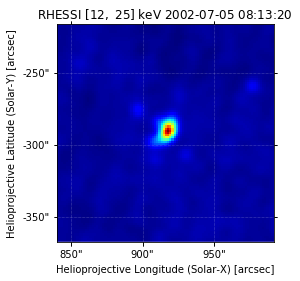

 [sunpy.map.mapbase]


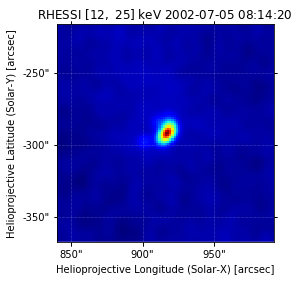

In [9]:
# you shoould now have new layer(s) in JHV
# if you want, you can also display the maps here:
import matplotlib.pyplot as plt
for energy_band in maps:
    for i in range(len(maps[energy_band])):
        plt.figure()
        maps[energy_band][i].plot()
        plt.show()